In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Dataset

In [ ]:
fasion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [17]:
train_images.shape
#type(train_images)

(60000, 28, 28)

In [12]:
train_images[7, 12, 23] #pixel

225

In [13]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

Data Preprocesing

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax') #output layer
])

Compile

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Evaluasi

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


Predictions

In [27]:
predictions = model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

9

Verifying Predictions

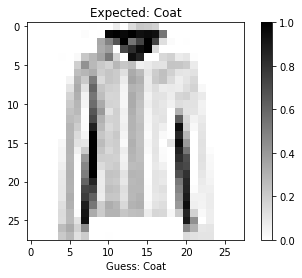

In [30]:
def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angkle Boot']

    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    #plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)